In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [59]:
df=pd.read_csv('../Task 12 Face-detect MNIST/KNN MNIST/train.csv')
df.info()

FileNotFoundError: [Errno 2] No such file or directory: '../../Task 12 Face-detect MNIST/KNN MNIST/train.csv'

In [14]:
X=df.iloc[:,1:].to_numpy()
Y=df.iloc[:,0].to_numpy()

In [17]:
sc=StandardScaler()

In [18]:
X=sc.fit_transform(X)

# Demonstration using sklearn

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
z_pca = pca.fit_transform(X)
z_pca.shape

(42000, 2)

In [30]:
z_pca

array([[-5.14045172, -5.22667729],
       [19.29232305,  6.03285989],
       [-7.64454382, -1.70607196],
       ...,
       [ 0.49537869,  7.07621576],
       [ 2.30722238, -4.34460813],
       [-4.80759984,  1.55935433]])

In [31]:
pca.explained_variance_

array([40.69647874, 29.11146547])

# Without sklearn

In [32]:
import numpy as np

In [33]:
covar = np.dot(X.T,X)

In [34]:
covar.shape

(784, 784)

In [35]:
from numpy.linalg import svd
U,S,V = svd(covar)
U.shape

(784, 784)

In [36]:
Ured=U[:,:2]
Ured.shape

(784, 2)

In [37]:
Z = np.dot(X,Ured)

In [38]:
Z.shape

(42000, 2)

In [39]:
Z

array([[-5.14047772, -5.2264454 ],
       [19.29233234,  6.03299601],
       [-7.64450341, -1.70581328],
       ...,
       [ 0.49539137,  7.07627667],
       [ 2.30724011, -4.34451279],
       [-4.80767022,  1.55912058]])

# Visualize Dataset

In [47]:
# Y=Y.resize((-1,1))
print(Y.shape)
new_dataset=np.hstack((Z,Y.reshape((-1,1))))
dataframe=pd.DataFrame(new_dataset,columns=["PC1","PC2","Number"])
dataframe.head()

(42000,)


,PC1,PC2,Number
0,-5.140478,-5.226445,1.0
1,19.292332,6.032996,0.0
2,-7.644503,-1.705813,1.0
3,-0.474207,5.836139,4.0
4,26.559574,6.024818,0.0


<Figure size 1080x1080 with 0 Axes>

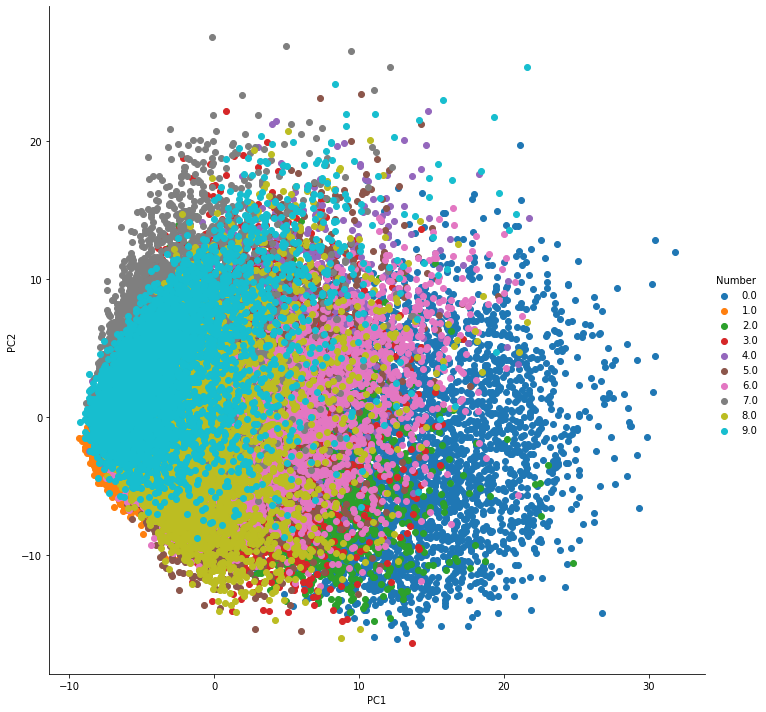

In [50]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue="Number", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

# How to choose best value of dimension

In [51]:
pca = PCA()

In [52]:
Z_pca=pca.fit_transform(X)

In [53]:
Z_pca.shape

(42000, 784)

In [54]:
pca.explained_variance_

array([4.06964787e+01, 2.91114657e+01, 2.67833371e+01, 2.08147194e+01,
       1.81000206e+01, 1.57876737e+01, 1.38244007e+01, 1.25432643e+01,
       1.10638975e+01, 1.00889267e+01, 9.63617203e+00, 8.65579470e+00,
       8.04120472e+00, 7.88086691e+00, 7.43637560e+00, 7.16743699e+00,
       6.73538375e+00, 6.61651973e+00, 6.42354578e+00, 6.26826675e+00,
       5.93960379e+00, 5.74928832e+00, 5.48826880e+00, 5.32649477e+00,
       5.15217038e+00, 4.94730998e+00, 4.88853571e+00, 4.70777145e+00,
       4.46528559e+00, 4.36351702e+00, 4.32543150e+00, 4.22712324e+00,
       4.08726514e+00, 4.06176768e+00, 3.99903435e+00, 3.86804997e+00,
       3.81925839e+00, 3.71256507e+00, 3.57437538e+00, 3.45887625e+00,
       3.41436841e+00, 3.36945857e+00, 3.25693182e+00, 3.24008824e+00,
       3.18312949e+00, 3.16286640e+00, 3.14244041e+00, 3.09287815e+00,
       3.06368054e+00, 3.02342271e+00, 2.96849737e+00, 2.91830693e+00,
       2.84948896e+00, 2.82806029e+00, 2.79589667e+00, 2.76696531e+00,
      

In [55]:
pca.explained_variance_/np.sum(pca.explained_variance_)
# or pca.explained_variance_ratio_

array([5.74795336e-02, 4.11169103e-02, 3.78286715e-02, 2.93986212e-02,
       2.55643921e-02, 2.22984433e-02, 1.95255247e-02, 1.77160531e-02,
       1.56266017e-02, 1.42495571e-02, 1.36100884e-02, 1.22254076e-02,
       1.13573634e-02, 1.11309029e-02, 1.05031053e-02, 1.01232575e-02,
       9.51302738e-03, 9.34514435e-03, 9.07258876e-03, 8.85327331e-03,
       8.38907114e-03, 8.12027039e-03, 7.75160752e-03, 7.52311857e-03,
       7.27690355e-03, 6.98755959e-03, 6.90454706e-03, 6.64923638e-03,
       6.30675038e-03, 6.16301289e-03, 6.10922106e-03, 5.97037089e-03,
       5.77283590e-03, 5.73682340e-03, 5.64821911e-03, 5.46321734e-03,
       5.39430432e-03, 5.24361113e-03, 5.04843259e-03, 4.88530211e-03,
       4.82243943e-03, 4.75900896e-03, 4.60007666e-03, 4.57628685e-03,
       4.49583855e-03, 4.46721905e-03, 4.43836948e-03, 4.36836795e-03,
       4.32712937e-03, 4.27026938e-03, 4.19269307e-03, 4.12180430e-03,
       4.02460610e-03, 3.99434033e-03, 3.94891257e-03, 3.90805004e-03,
      

In [56]:
cum_var_explained=np.cumsum(pca.explained_variance_ratio_)

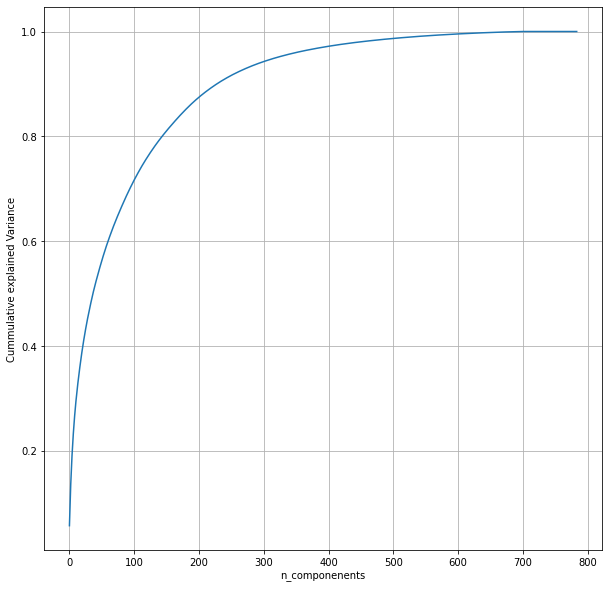

In [58]:
plt.figure(figsize=(10,10))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_componenents")
plt.ylabel("Cummulative explained Variance")
plt.show()